In [55]:
import pandas as pd

# Read the 2017 yellow taxi trip data
df_2017 = pd.read_csv('2017_yellow_taxi_trip_data.csv')


In [56]:
df0 = df_2017.dropna()


In [57]:
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


In [58]:
df0.describe()

,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [59]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount             22699 non-null  float64
 15  to

In [60]:
# Convert pickup and dropoff datetime columns to datetime objects
df0['tpep_pickup_datetime'] = pd.to_datetime(df0['tpep_pickup_datetime'])
df0['tpep_dropoff_datetime'] = pd.to_datetime(df0['tpep_dropoff_datetime'])


In [61]:
# Create time period assignments
df0['time_period'] = pd.cut(df0['tpep_dropoff_datetime'].dt.hour,
                           bins=[-1, 5, 11, 17, 23],
                           labels=['overnight', 'morning', 'afternoon', 'evening'])

# Create dummy variables for time periods
time_period_dummies = pd.get_dummies(df0['time_period'], prefix='time_period')

# Add dummy columns to dataframe
df0 = pd.concat([df0, time_period_dummies], axis=1)

# Drop original datetime columns
df0 = df0.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'time_period'], axis=1)


In [62]:
df0.head

<bound method NDFrame.head of        Unnamed: 0  VendorID  passenger_count  trip_distance  RatecodeID  \
0        24870114         2                6           3.34           1   
1        35634249         1                1           1.80           1   
2       106203690         1                1           1.00           1   
3        38942136         2                1           3.70           1   
4        30841670         2                1           4.37           1   
...           ...       ...              ...            ...         ...   
22694    14873857         2                3           0.61           1   
22695    66632549         2                1          16.71           2   
22696    74239933         2                1           0.42           1   
22697    60217333         2                1           2.36           1   
22698    17208911         1                1           2.10           1   

      store_and_fwd_flag  PULocationID  DOLocationID  payment_type  \

In [63]:
df0['store_and_fwd_flag'] = df0['store_and_fwd_flag'].map({'Y': 1, 'N': 0})
# Convert boolean columns to 0/1
boolean_columns = df0.select_dtypes(include=['bool']).columns
for col in boolean_columns:
    df0[col] = df0[col].astype(int)


In [64]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   passenger_count        22699 non-null  int64  
 3   trip_distance          22699 non-null  float64
 4   RatecodeID             22699 non-null  int64  
 5   store_and_fwd_flag     22699 non-null  int64  
 6   PULocationID           22699 non-null  int64  
 7   DOLocationID           22699 non-null  int64  
 8   payment_type           22699 non-null  int64  
 9   fare_amount            22699 non-null  float64
 10  extra                  22699 non-null  float64
 11  mta_tax                22699 non-null  float64
 12  tip_amount             22699 non-null  float64
 13  tolls_amount           22699 non-null  float64
 14  improvement_surcharge  22699 non-null  float64
 15  to

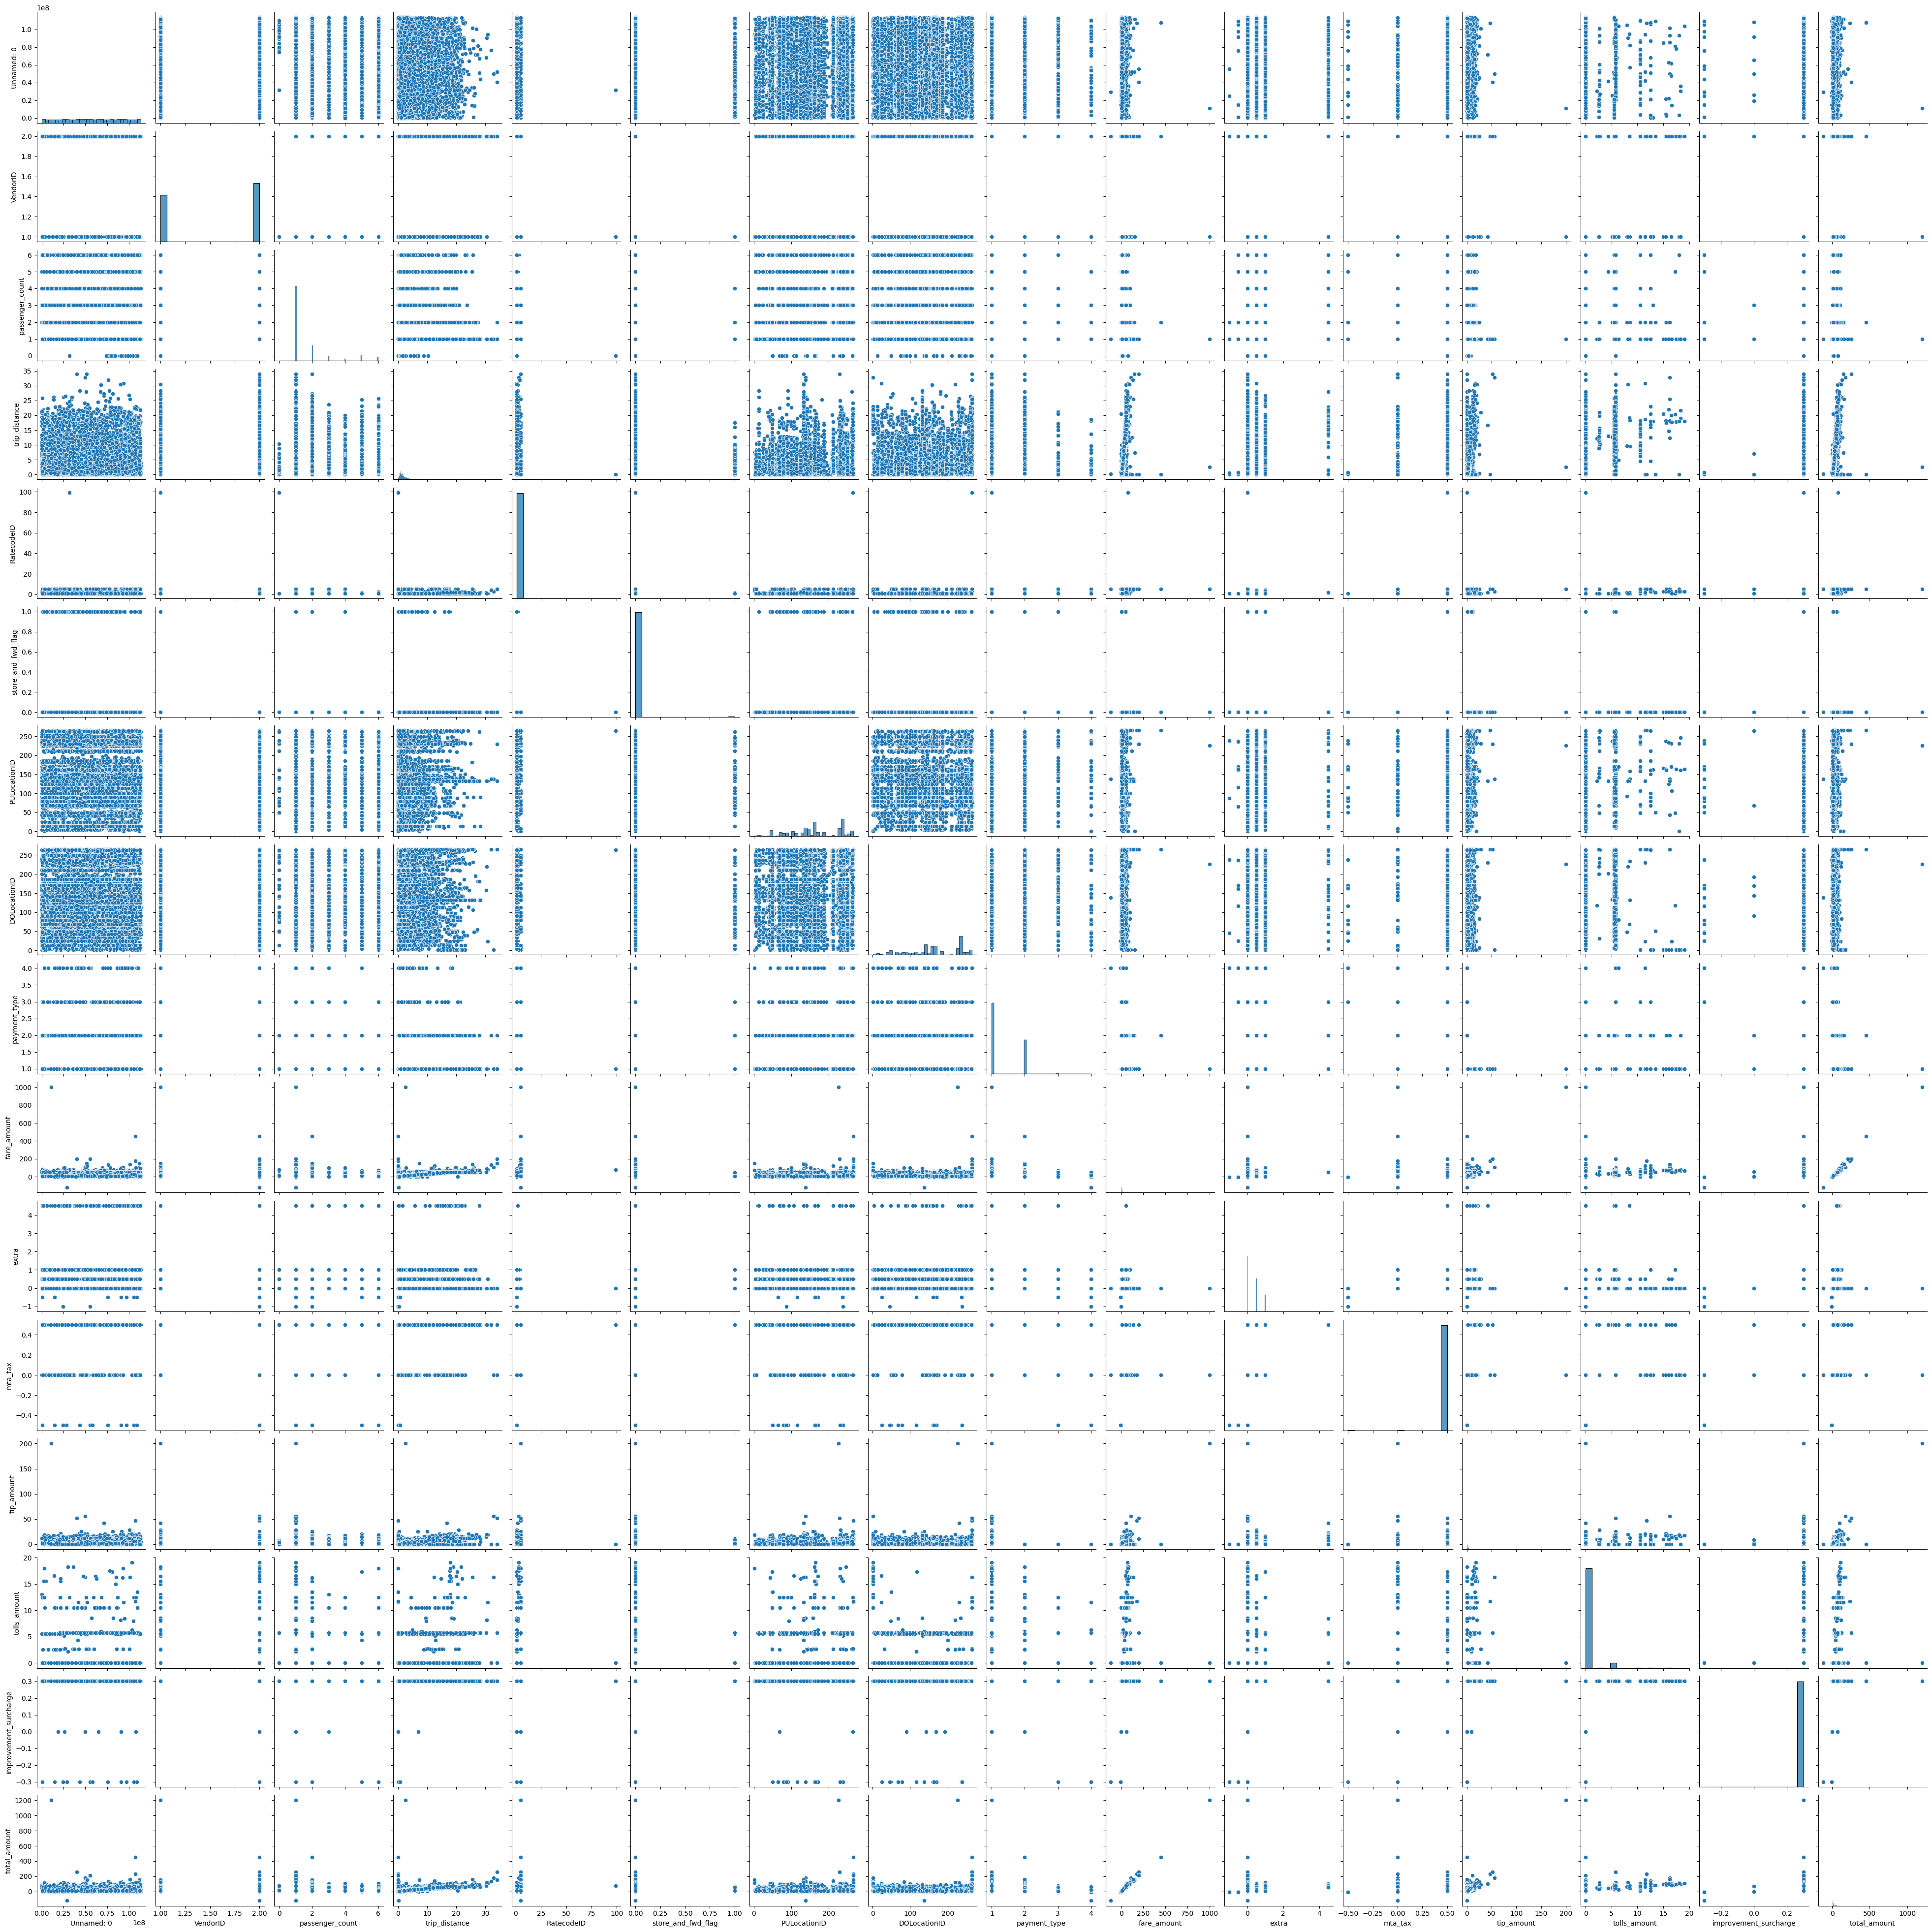

In [65]:
# Create pairplot using seaborn
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns only
numeric_cols = df0.select_dtypes(include=['int64', 'float64']).columns

# Create pairplot
sns.pairplot(df0[numeric_cols])
plt.show()


In [66]:
# Export dataframe to CSV file
df0.to_csv('taxi_data_processed.csv', index=False)


In [67]:

# Create the new columns based on instructions
df0["trip_efficiency"] = df0["fare_amount"] / df0["trip_distance"]
df0["tip_percentage"] = df0["tip_amount"] / df0["fare_amount"]
df0["total_charges_without_tip"] = df0["total_amount"] - df0["tip_amount"]

# Since timestamps were dropped, we cannot calculate trip_speed_estimate accurately, so set as NaN/None.
df0["trip_speed_estimate"] = None

# One-hot encode payment_type (assuming it is categorical)
df1 = pd.get_dummies(df0, columns=["payment_type"], prefix="payment_type")




In [68]:
df1.drop(["trip_speed_estimate", "Unnamed: 0", "store_and_fwd_flag"], axis=1, inplace=True)


In [69]:
df0.dtypes

Unnamed: 0                     int64
VendorID                       int64
passenger_count                int64
trip_distance                float64
RatecodeID                     int64
store_and_fwd_flag             int64
PULocationID                   int64
DOLocationID                   int64
payment_type                   int64
fare_amount                  float64
extra                        float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
improvement_surcharge        float64
total_amount                 float64
time_period_overnight          int32
time_period_morning            int32
time_period_afternoon          int32
time_period_evening            int32
trip_efficiency              float64
tip_percentage               float64
total_charges_without_tip    float64
trip_speed_estimate           object
dtype: object

In [70]:
df0.describe()


C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,time_period_overnight,time_period_morning,time_period_afternoon,time_period_evening,trip_efficiency,tip_percentage,total_charges_without_tip
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,...,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,2.269600e+04,22693.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,0.004361,162.412353,161.527997,1.336887,13.026629,...,0.312542,0.299551,16.310502,0.112516,0.236090,0.304859,0.346535,NaN,0.143965,14.474721
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,0.065898,66.633373,70.139691,0.496211,13.243791,...,1.399212,0.015673,16.097295,0.316007,0.424687,0.460358,0.475877,NaN,0.139918,14.051942
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,-120.000000,...,0.000000,-0.300000,-120.300000,0.000000,0.000000,0.000000,0.000000,-inf,0.000000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,0.000000,114.000000,112.000000,1.000000,6.500000,...,0.000000,0.300000,8.750000,0.000000,0.000000,0.000000,0.000000,4.333333e+00,0.000000,7.800000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,0.000000,162.000000,162.000000,1.000000,9.500000,...,0.000000,0.300000,11.800000,0.000000,0.000000,0.000000,0.000000,5.525961e+00,0.181818,10.300000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,0.000000,233.000000,233.000000,2.000000,14.500000,...,0.000000,0.300000,17.800000,0.000000,0.000000,1.000000,1.000000,7.142857e+00,0.229091,15.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,1.000000,265.000000,265.000000,4.000000,999.990000,...,19.100000,0.300000,1200.290000,1.000000,1.000000,1.000000,1.000000,inf,5.600000,1000.290000


In [83]:
# Drop pickup and dropoff location IDs
df1.drop(["PULocationID", "DOLocationID"], axis=1, inplace=True)


In [84]:
# One-hot encode VendorID (1 = Creative Mobile Technologies, 2 = VeriFone Inc.)
df1["vendor_creative_mobile"] = (df1["VendorID"] == 1)
df1["vendor_verifone"] = (df1["VendorID"] == 2)

# Drop original VendorID column
df1.drop("VendorID", axis=1, inplace=True)


In [85]:
df1["RatecodeID"].value_counts()


RatecodeID
1     22070
2       513
5        68
3        39
4         8
99        1
Name: count, dtype: int64

In [86]:
# Drop row with RatecodeID 99 since it's an outlier
df1 = df1[df1["RatecodeID"] != 99]

# Create dummy variables for RatecodeID
df1["rate_standard"] = (df1["RatecodeID"] == 1)
df1["rate_jfk"] = (df1["RatecodeID"] == 2) 
df1["rate_newark"] = (df1["RatecodeID"] == 3)
df1["rate_nassau_westchester"] = (df1["RatecodeID"] == 4)
df1["rate_negotiated"] = (df1["RatecodeID"] == 5)
df1["rate_group_ride"] = (df1["RatecodeID"] == 6)

# Drop original RatecodeID column
df1.drop("RatecodeID", axis=1, inplace=True)


In [87]:
df1.dtypes

passenger_count                int64
trip_distance                float64
fare_amount                  float64
extra                        float64
mta_tax                      float64
tip_amount                   float64
tolls_amount                 float64
improvement_surcharge        float64
total_amount                 float64
time_period_overnight          int32
time_period_morning            int32
time_period_afternoon          int32
time_period_evening            int32
trip_efficiency              float64
tip_percentage               float64
total_charges_without_tip    float64
payment_type_1                  bool
payment_type_2                  bool
payment_type_3                  bool
payment_type_4                  bool
vendor_creative_mobile          bool
vendor_verifone                 bool
rate_standard                   bool
rate_jfk                        bool
rate_newark                     bool
rate_nassau_westchester         bool
rate_negotiated                 bool
r

In [88]:
# Import StandardScaler
from sklearn.preprocessing import StandardScaler

# Create scaler object
scaler = StandardScaler()

# List of continuous variables to scale
continuous_vars = ['trip_distance', 'fare_amount', 'tip_amount', 'tolls_amount', 'total_amount']

# Fit and transform the selected columns
df1[continuous_vars] = scaler.fit_transform(df1[continuous_vars])


In [90]:
df1.describe()

C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\numpy\core\_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,time_period_overnight,time_period_morning,time_period_afternoon,time_period_evening,trip_efficiency,tip_percentage,total_charges_without_tip
count,22698.000000,2.269800e+04,2.269800e+04,22698.000000,22698.000000,2.269800e+04,2.269800e+04,22698.000000,2.269800e+04,22698.000000,22698.000000,22698.000000,22698.000000,2.269500e+04,22692.000000,22698.000000
mean,1.642391,6.073015e-17,-4.914759e-17,0.333289,0.497445,-7.199966e-17,7.779094e-17,0.299551,-1.731122e-16,0.112521,0.236100,0.304829,0.346550,NaN,0.143972,14.471922
std,1.285213,1.000022e+00,1.000022e+00,0.463101,0.039466,1.000022e+00,1.000022e+00,0.015673,1.000022e+00,0.316013,0.424694,0.460345,0.475881,NaN,0.139918,14.045923
min,0.000000,-7.975214e-01,-1.004944e+01,-1.000000,-0.500000,-6.555247e-01,-2.233798e-01,-0.300000,-8.489128e+00,0.000000,0.000000,0.000000,0.000000,-inf,0.000000,-120.300000
25%,1.000000,-5.265201e-01,-4.928483e-01,0.000000,0.500000,-6.555247e-01,-2.233798e-01,0.300000,-4.696585e-01,0.000000,0.000000,0.000000,0.000000,4.333333e+00,0.000000,7.800000
50%,1.000000,-3.568022e-01,-2.662097e-01,0.000000,0.500000,-1.734851e-01,-2.233798e-01,0.300000,-2.801243e-01,0.000000,0.000000,0.000000,0.000000,5.525606e+00,0.181871,10.300000
75%,2.000000,4.011878e-02,1.115211e-01,0.500000,0.500000,2.192880e-01,-2.233798e-01,0.300000,9.272978e-02,0.000000,0.000000,1.000000,1.000000,7.142857e+00,0.229091,15.800000
max,6.000000,8.498642e+00,7.456152e+01,4.500000,0.500000,7.075775e+01,1.342718e+01,0.300000,7.357543e+01,1.000000,1.000000,1.000000,1.000000,inf,5.600000,1000.290000


In [91]:
# Drop trip_efficiency column since it contains inf/-inf values
df1.drop('trip_efficiency', axis=1, inplace=True)


In [92]:
# Split data into train and test sets (75/25)
from sklearn.model_selection import train_test_split

X = df1.drop(['tip_amount'], axis=1)
y = df1['tip_amount']

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Split training data into train and validation sets (70/30)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.3, random_state=42)


In [93]:
# Check for NaN values in our features
print("Columns with NaN values:")
print(X_train.isna().sum()[X_train.isna().sum() > 0])

Columns with NaN values:
tip_percentage    3
dtype: int64


In [81]:
# Drop any rows with missing values
X_train = X_train.dropna()
X_val = X_val.dropna()
X_test = X_test.dropna()

# Drop corresponding rows from target variables 
y_train = y_train[X_train.index]
y_val = y_val[X_val.index] 
y_test = y_test[X_test.index]

print("Shape after dropping missing values:")
print(f"X_train: {X_train.shape}")
print(f"X_val: {X_val.shape}") 
print(f"X_test: {X_test.shape}")


Shape after dropping missing values:
X_train: (0, 26)
X_val: (0, 26)
X_test: (0, 26)


In [94]:
# Handle NaN values - we'll use median imputation for numeric columns
from sklearn.impute import SimpleImputer

# Create imputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the training data
X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns)

# Now try the random forest with the imputed data
rf_model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross validation on training data
cv_scores = cross_val_score(rf_model, X_train_imputed, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert MSE scores to RMSE
rmse_scores = np.sqrt(-cv_scores)

print("\nCross-validation RMSE scores:", rmse_scores)
print("Average RMSE:", rmse_scores.mean())
print("Standard deviation:", rmse_scores.std())

# Fit model on full training set
rf_model.fit(X_train_imputed, y_train)

# Make predictions on validation set
val_predictions = rf_model.predict(X_val_imputed)

# Calculate RMSE on validation set
from sklearn.metrics import mean_squared_error
val_rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print("\nValidation set RMSE:", val_rmse)


Cross-validation RMSE scores: [0.04795063 0.37241958 0.15014372 0.10449622 0.11119714]
Average RMSE: 0.1572414580046972
Standard deviation: 0.11242653273541876

Validation set RMSE: 0.04752822869832935


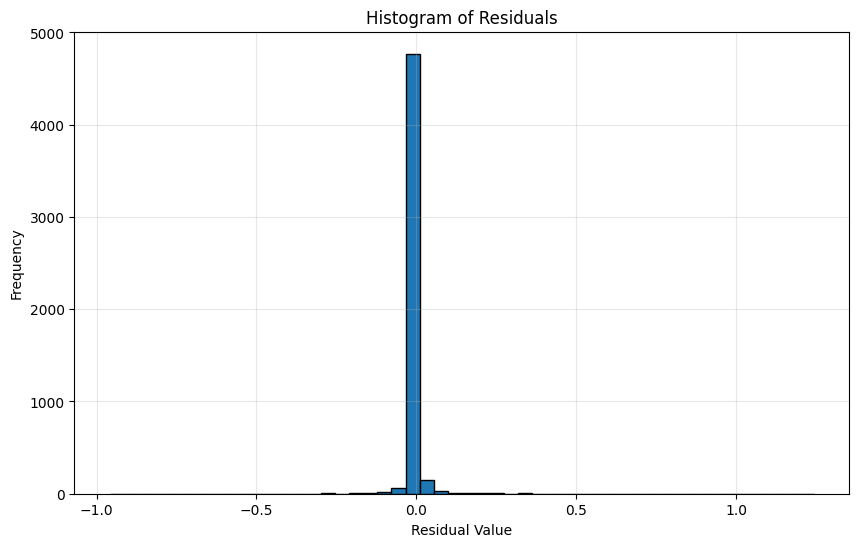

In [46]:
# Calculate residuals on validation set
residuals = y_val - val_predictions

# Create histogram of residuals
plt.figure(figsize=(10,6))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()


In [95]:
# Import XGBoost and metrics
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

# Create XGBoost classifier
xgb_model = XGBClassifier(random_state=42)

# Get payment_type_1 as target variable
y_train_payment = X_train_imputed['payment_type_1']
y_val_payment = X_val_imputed['payment_type_1']

# Remove payment type columns from features
payment_cols = ['payment_type_1', 'payment_type_2', 'payment_type_3', 'payment_type_4']
X_train_payment = X_train_imputed.drop(payment_cols, axis=1)
X_val_payment = X_val_imputed.drop(payment_cols, axis=1)

# Perform 5-fold cross validation
cv_scores = cross_val_score(xgb_model, X_train_payment, y_train_payment, cv=5, scoring='accuracy')

print("\nCross-validation accuracy scores:", cv_scores)
print("Average accuracy:", cv_scores.mean())
print("Standard deviation:", cv_scores.std())

# Fit model on full training set
xgb_model.fit(X_train_payment, y_train_payment)

# Make predictions on validation set
val_predictions = xgb_model.predict(X_val_payment)

# Print validation set metrics
print("\nValidation set accuracy:", accuracy_score(y_val_payment, val_predictions))
print("\nClassification Report:")
print(classification_report(y_val_payment, val_predictions))



Cross-validation accuracy scores: [0.97525168 0.97146454 0.96726815 0.96852707 0.97188418]
Average accuracy: 0.9708791228134409
Standard deviation: 0.002794401098406577

Validation set accuracy: 0.9688662619933425

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      1682
         1.0       1.00      0.96      0.98      3425

    accuracy                           0.97      5107
   macro avg       0.96      0.97      0.97      5107
weighted avg       0.97      0.97      0.97      5107



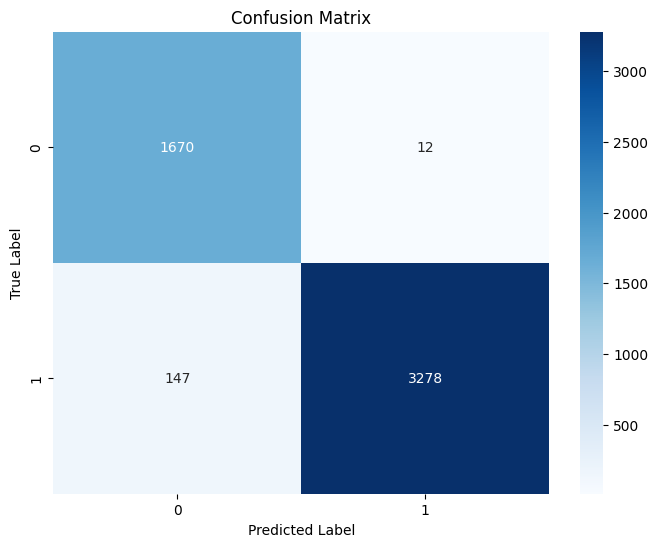

In [96]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_val_payment, val_predictions)

# Create heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [49]:
# Train Random Forest model with GridSearch
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid (limited for runtime)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create RF classifier
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train_payment, y_train_payment)

# Get best model
rf_best = grid_search.best_estimator_

# Make predictions on validation set
rf_predictions = rf_best.predict(X_val_payment)

print("\nBest Random Forest Parameters:", grid_search.best_params_)
print("\nRandom Forest Classification Report:")
print(classification_report(y_val_payment, rf_predictions))

# Compare F1 scores
print("\nModel F1 Score Comparison:")
print("XGBoost F1:", f1_score(y_val_payment, val_predictions))
print("Random Forest F1:", f1_score(y_val_payment, rf_predictions))

# Plot RF confusion matrix
plt.figure(figsize=(8,6))
cm_rf = confusion_matrix(y_val_payment, rf_predictions)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()



Best Random Forest Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Random Forest Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      1681
         1.0       1.00      0.96      0.98      3425

    accuracy                           0.97      5106
   macro avg       0.96      0.98      0.97      5106
weighted avg       0.97      0.97      0.97      5106


Model F1 Score Comparison:


NameError: name 'f1_score' is not defined

C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\mason\AppData\Roaming\Python\Python312\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **


KMeans Cluster Sizes:
Cluster 0: 7459
Cluster 1: 430
Cluster 2: 3132
Cluster 3: 1
Cluster 4: 869
Cluster 5: 22


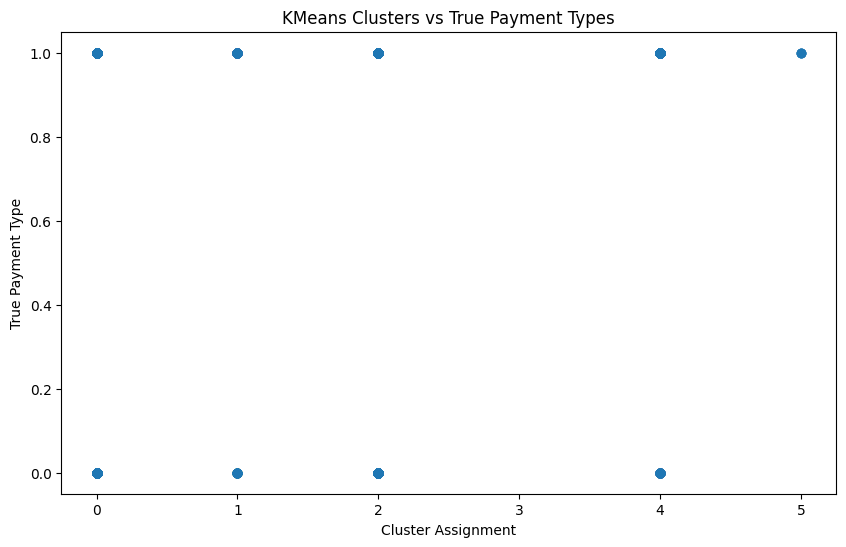


Cluster Centers:
   passenger_count  trip_distance  fare_amount     extra   mta_tax  \
0         1.630513      -0.462884    -0.434494  0.305671  0.498793   
1         1.653488       3.556597     2.903163  0.648837  0.480233   
2         1.641443       0.132147     0.199128  0.358876  0.499681   
3         2.000000      -0.797521    33.011878  0.000000  0.000000   
4         1.703107       1.578013     1.303108  0.346951  0.497699   
5         1.818182       4.178424     7.082406  0.022727  0.227273   

   tolls_amount  improvement_surcharge  total_amount  time_period_overnight  \
0     -0.222374               0.299437     -0.425959               0.106583   
1      2.753964               0.300000      2.994815               0.081395   
2     -0.211751               0.300000      0.160315               0.115581   
3     -0.223380               0.300000     26.969294               0.000000   
4      1.116205               0.300000      1.333549               0.168009   
5      6.744511  

In [51]:
# Import KMeans
from sklearn.cluster import KMeans

# Create and fit KMeans model
kmeans = KMeans(n_clusters=6, random_state=42)
kmeans_predictions = kmeans.fit_predict(X_train_payment)

# Make predictions on validation set
kmeans_val_predictions = kmeans.predict(X_val_payment)

# Print cluster sizes
print("\nKMeans Cluster Sizes:")
for i in range(6):
    print(f"Cluster {i}: {sum(kmeans_predictions == i)}")

# Plot cluster assignments vs true payment types
plt.figure(figsize=(10,6))
plt.scatter(kmeans_val_predictions, y_val_payment, alpha=0.5)
plt.xlabel('Cluster Assignment')
plt.ylabel('True Payment Type')
plt.title('KMeans Clusters vs True Payment Types')
plt.show()

# Print cluster centers
print("\nCluster Centers:")
cluster_centers = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=X_train_payment.columns
)
print(cluster_centers)


In [54]:
df0['payment_type'].value_counts()


KeyError: 'payment_type'

In [53]:
# Make predictions on test set
kmeans_test_predictions = kmeans.predict(X_val_payment)

# Calculate and print F1 score
from sklearn.metrics import f1_score
print("\nKMeans Model Performance:")
print("F1 Score on Test Set:", f1_score(y_val_payment, kmeans_test_predictions, average='weighted'))




KMeans Model Performance:
F1 Score on Test Set: 0.2023863724437491
